# 資料預處理

In [1]:
import numpy
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(X_img_train, y_label_train), (X_img_test, y_label_test) = cifar10.load_data()

In [3]:
print("train data:",'images:',X_img_train.shape," labels:",y_label_train.shape) 
print("test  data:",'images:',X_img_test.shape ," labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
X_img_train_normalize = X_img_train / 255.0
X_img_test_normalize = X_img_test / 255.0

In [5]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [6]:
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import ZeroPadding2D
from keras.models import Model
from keras.layers import Dropout
from models import alexnet_cifar

In [8]:
model=alexnet_cifar(input_shape=(32,32,3),classes=10)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 48)        1344      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 96)        41568     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 96)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 192)         166080    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 192)         331968    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 256)         442624    
__________

# 訓練模型

In [9]:
train_history=model.fit(X_img_train_normalize ,y_label_train_OneHot, epochs = 10,validation_split=0.2,verbose=1,batch_size=128)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 340s 9ms/step - loss: 1.8699 - acc: 0.2768 - val_loss: 1.6173 - val_acc: 0.4081
Epoch 2/10
40000/40000 [==============================] - 310s 8ms/step - loss: 1.3769 - acc: 0.4975 - val_loss: 1.2207 - val_acc: 0.5591
Epoch 3/10
40000/40000 [==============================] - 290s 7ms/step - loss: 1.1528 - acc: 0.5905 - val_loss: 0.9871 - val_acc: 0.6461
Epoch 4/10
40000/40000 [==============================] - 309s 8ms/step - loss: 1.0002 - acc: 0.6506 - val_loss: 0.9065 - val_acc: 0.6791
Epoch 5/10
40000/40000 [==============================] - 306s 8ms/step - loss: 0.8663 - acc: 0.7011 - val_loss: 0.8270 - val_acc: 0.7145
Epoch 6/10
40000/40000 [==============================] - 325s 8ms/step - loss: 0.7584 - acc: 0.7394 - val_loss: 0.7857 - val_acc: 0.7277
Epoch 7/10
40000/40000 [==============================] - 311s 8ms/step - loss: 0.6702 - acc: 0.7725 - val_loss: 0.7602 - 

# 評估模型準確率

In [10]:
#X_img_test_normalize
#y_label_test_OneHot
preds=model.evaluate(X_img_test_normalize,y_label_test_OneHot)
print("Validation loss="+str(preds[0]))
print("Validation accuracy="+str(preds[1]))

10000/10000 [==============================] - 21s 2ms/step
Validation loss=0.8066101175785064
Validation accuracy=0.7422


# 以圖形顯示訓練過程

In [11]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

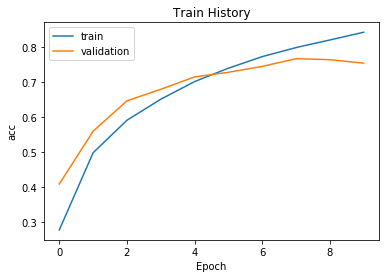

In [12]:
show_train_history(train_history,'acc','val_acc')

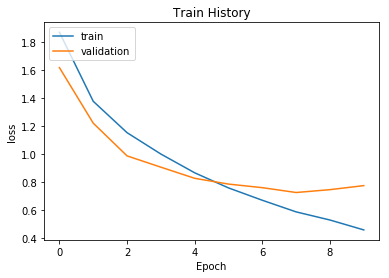

In [13]:
show_train_history(train_history,'loss','val_loss')

# 進行預測

In [14]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [15]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[idx][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[idx]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

In [16]:
prediction=model.predict_classes(X_img_test_normalize)

10000/10000 [==============================] - 22s 2ms/step


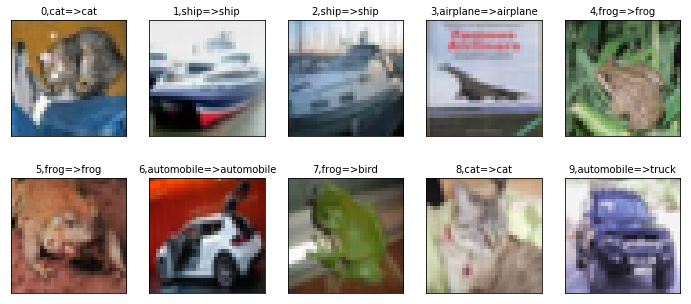

In [17]:
plot_images_labels_prediction(X_img_test,y_label_test,
                              prediction,0,10)

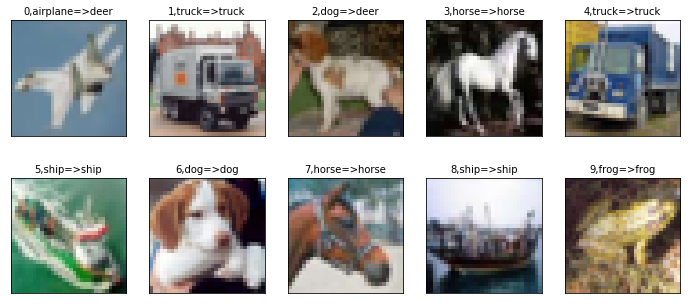

In [18]:
plot_images_labels_prediction(X_img_test,y_label_test,
                              prediction,10,10)

# confusion matrix

In [19]:
import pandas as pd
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predicat'])

predicat,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,717,7,73,38,30,2,1,8,92,32
1,16,767,5,11,3,4,15,5,35,139
2,43,2,616,81,132,48,38,16,15,9
3,9,1,71,653,70,108,38,24,12,14
4,5,1,46,64,803,17,13,39,11,1
5,5,0,47,224,64,599,11,36,7,7
6,2,2,43,108,66,19,749,2,5,4
7,6,0,34,55,93,45,2,748,3,14
8,24,11,10,23,7,4,2,0,891,28
